In [3]:
## DATA
# 

In [1]:
import pandas as pd
import statistics 
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
import sys
import os

In [2]:

parentdir = 'C:\\Users\\danie\\Documents\\work\\testingRS\\TESTS'
sys.path.insert(0,parentdir) 
import utils.dataset_metrics as dt


In [3]:
folder = 'C:\\Users\\danie\\Documents\\work\\testingRS\\TESTS\\'
articles_df = pd.read_csv(os.path.join(folder, 'articles/shared_articles.csv'))
articles_df = articles_df[articles_df['eventType'] == 'CONTENT SHARED']
interactions_df = pd.read_csv(os.path.join(folder,'articles/users_interactions.csv'))
interactions_df = interactions_df[['timestamp','eventType', 'contentId','personId','sessionId']]
interactions_df = interactions_df[interactions_df['contentId'].isin(articles_df['contentId'])]

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
48,1459315656,CONTENT SHARED,-4571929941432664145,-1032019229384696495,-1858408872346331823,NaN,NaN,NaN,HTML,http://www.huffingtonpost.com/laura-dambrosio/...,Machine Learning as a Service: How Data Scienc...,Machine learning is an enigma to most. For dec...,en


In [13]:
# interactions_def

### Convert interaction to our cases and to Rating

In [8]:
change_interaction = {
   'VIEW': 'CLICK',
   'LIKE': 'EXPLICIT', 
   'BOOKMARK': 'SAVE', 
   'FOLLOW': 'TIME_OPEN',
   'COMMENT CREATED': 'RECOMMEND',  
}

values_interaction = {
    'CLICK' : 2.0,
    'EXPLICIT' : 5.0,
    'SAVE': 3.0,
    'TIME_OPEN': 3.0,
    'RECOMMEND': 3.5
}

interactions_def = dt.convert_interactions(change_interaction, values_interaction, interactions_df)
interactions_ordered = interactions_def


In [9]:
interactions_ordered.head()

,timestamp,eventType,contentId,personId,sessionId,rating
25734,1459195400,CLICK,3353902017498793780,-2626634673110551643,6793304606618189201,2.0
25735,1459195417,CLICK,-7926018713416777892,-2626634673110551643,6793304606618189201,2.0
8016,1459196576,CLICK,3353902017498793780,-1032019229384696495,5722501396463931551,2.0
26119,1459211064,CLICK,-6151852268067518688,-1443636648652872475,-9071650721576979280,2.0
33065,1459213506,CLICK,-2826566343807132236,-8389868196569319547,-6280969382462826000,2.0


### Partition of interactions - to inspect data

In [9]:
sparsities = []
subs = []
number_users = []
number_items = []
m3 = []
for i in range(1, round(interactions_ordered.shape[0]/1000), 2):
    if i < 70 and i != 0 :
        N_interactions = i*1000
    if i == 70  and i != 0:
        N_interactions = interactions_ordered.shape[0]
    else:
        pass
    subs.append(N_interactions)
    utility_matrix, interactions_subset = dt.get_subset(interactions_ordered, N_interactions)
    ids_users = list(interactions_subset.personId.unique())
    ids_items = list(interactions_subset.contentId.unique())
    sparsities.append(dt.get_overall_sparsity(utility_matrix))
    number_users.append(len(ids_users))
    number_items.append(len(ids_items))

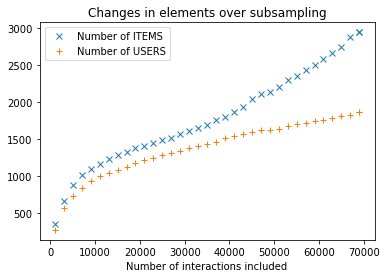

In [22]:
x = subs
y = [number_items, number_users]
labels = ['Number of ITEMS' , 'Number of USERS']
markers = ['x' , '+']

for i,j in enumerate(y):
    plt.plot(x, j, markers[i], label= labels[i])
plt.title('Changes in elements over subsampling')
plt.xlabel('Number of interactions included')
plt.legend(numpoints=1)

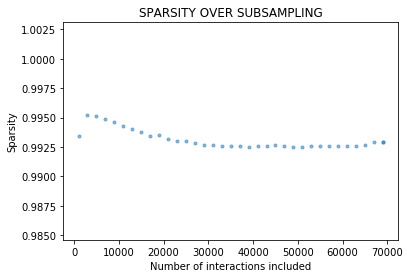

In [23]:
area = np.pi*3
plt.scatter(subs, sparsities, s=area, alpha=0.5)
plt.title('SPARSITY OVER SUBSAMPLING')
plt.xlabel('Number of interactions included')
plt.ylabel('Sparsity')
plt.show()

## SPLIT DATA FOR DIFFERENT TESTS 
### 1. 10,00 interactions
### 2. 40,000 interactions
### 3. whole dataset - around 72,000 interactions

In [17]:
subsets = [1000, 40000, interactions_ordered.shape[0]]
for i in subsets:
    matrix, interactions_final = dt.get_subset(interactions_ordered, i)
    print(interactions_final.shape)
    name = "objects/subset_{}.pkl".format(i)
    with open(os.path.join(folder,name), 'wb') as f:  
        pickle.dump([matrix, interactions_final], f)

(674, 3)
(20864, 3)
(40682, 3)


In [9]:
with open(os.path.join(folder,'objects/subset_1000.pkl'), 'rb') as f:  
    utility_matrix_1, interactions_work_1 = pickle.load(f)
with open(os.path.join(folder,'objects/subset_40000.pkl'), 'rb') as f:  
    utility_matrix_2, interactions_work_2 = pickle.load(f)
with open(os.path.join(folder,'objects/subset_72269.pkl'), 'rb') as f:  
    utility_matrix_3, interactions_work_3 = pickle.load(f)

In [11]:
users1 = interactions_work_1.personId.unique()
users2 = interactions_work_2.personId.unique()
users3 = interactions_work_3.personId.unique()

In [18]:
users_temp2 = [i for i in users2 if i not in users1] #1291
users_temp3 = [i for i in users3 if i not in users2] #370

In [21]:
len(users_temp2)

1291

In [22]:
interactions_work_1.shape

(674, 3)

## METRICS

In [15]:
USER = '-3596626804281480007'

### M1 - User activity for this subset

0.25


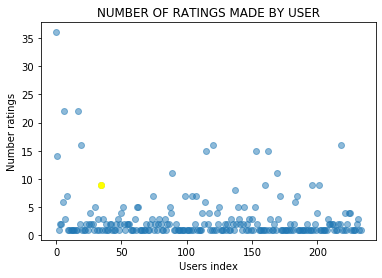

DEVIATION = 4.0 
MEDIAN = 1.0 
MEAN = 2


In [23]:
M1 = dt.get_metric1(USER, utility_matrix_1)
print(M1)
dt.plot_user_activity_m1(utility_matrix_1, USER)

## M3 - Items activity for this subset

0.007


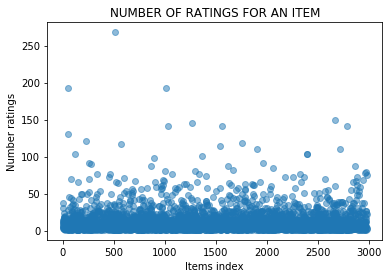

DEVIATION = 17.146428199482248 
MEDIAN = 9 
MEAN = 13


In [8]:
M3 = dt.get_metric3(utility_matrix_3)
print(M3) 
dt.plot_items_activity_m3(utility_matrix_3)

## M4 - Items descriptors

In [33]:
with open('objects/tfidf.pkl', 'rb') as f:  
    tfidf_matrix, tfidf_feature_names, full_item_ids = pickle.load(f)

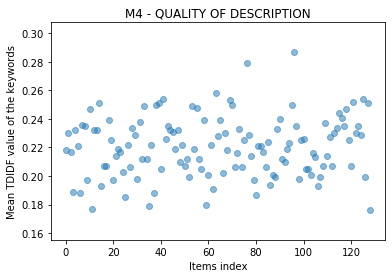

DEVIATION = 0.02075571976831387 
MEDIAN = 0.221 
MEAN = 0.22071317829457365
0.221


In [38]:
mean_q = dt.plot_quality_descriptors(utility_matrix_1,  tfidf_matrix, tfidf_feature_names, full_item_ids)
M4 = round(mean_q,3)
print(M4)